In [1]:
import yfinance as yf
import investpy as inpy
import pandas as pd # data wrangling
import pandas_datareader.data as web
import matplotlib.pyplot as plt # plotting
from datetime import date, timedelta

In [15]:
# Start start and end periods
last_week = date.today() - timedelta(7) # get gap of 7 days to forward fill NaN values
ytd_start = date.today().replace(month=1, day=1) 

last_week.strftime('%Y-%m-%d')
ytd_start.strftime('%Y-%m-%d')

end = date.today()
end.strftime('%Y-%m-%d')

'2022-11-04'

In [3]:
# Get closing price of any asset
def closing_price(ticker):
    asset = pd.DataFrame(
        yf.download(ticker, start=start, end=end)['Adj Close'])     
    return asset

DXY = closing_price('DX-Y.NYB')
DXY

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2022-10-28 00:00:00-04:00,110.669998
2022-10-31 00:00:00-04:00,111.529999
2022-11-01 00:00:00-04:00,111.480003
2022-11-02 00:00:00-04:00,111.349998
2022-11-03 00:00:00-04:00,112.930000


In [16]:
# Forex
currency = ['SGD','IDR','MYR','THB','TWD','PHP','KRW','JPY'] # yfinance does not support CNH/USD
currency2 = ['DX-Y.NYB']

# Append currencies that do not match main format
for i in range(len(currency)):
    currency[i] = currency[i] + '=X'
for j in range(len(currency2)):
    currency.append(currency2[j])

f = web.DataReader(currency, 'yahoo', ytd_start, end)

c_df = f[[("Adj Close", s) for s in currency]]
c_df = c_df.fillna(method='ffill') # forward fill NaN values
c_df.columns = c_df.columns.droplevel(level=0)
c_df = c_df.round(2)
c_df

Symbols,SGD=X,IDR=X,MYR=X,THB=X,TWD=X,PHP=X,KRW=X,JPY=X,DX-Y.NYB
Date,,,,,,,,,
2021-12-31,1.35,14285.2,4.17,33.33,27.66,51.24,1189.89,115.06,95.67
2022-01-03,1.35,14215.0,4.18,33.11,27.70,50.87,1187.78,115.14,96.24
2022-01-04,1.35,14283.6,4.17,33.24,27.62,51.42,1194.68,115.33,96.29
2022-01-05,1.36,14385.5,4.18,33.24,27.52,51.58,1196.50,116.17,96.19
2022-01-06,1.36,14446.5,4.19,33.25,27.60,50.89,1199.25,116.13,96.25
...,...,...,...,...,...,...,...,...,...
2022-10-31,1.41,15549.2,4.72,37.87,32.11,57.97,1421.65,147.81,111.53
2022-11-01,1.42,15649.0,4.72,38.06,32.25,58.07,1424.67,148.74,111.48
2022-11-02,1.41,15690.0,4.73,37.71,32.12,58.21,1416.60,147.91,111.35


In [5]:
c_df.to_csv('weekly_market_update.csv')

In [6]:
# Stocks
indices = ['DJI','JKSE','SET.BK','N225','TWII','KS11'] # yfinance does not support SSEC, STI, and KLSE
indices2 = ['PSEI.PS']

for i in range(len(indices)):
    indices[i] = '^' + indices[i]
for j in range(len(indices2)):
    indices.append(indices2[j])
    
f = web.DataReader(indices, 'yahoo', start, end)

i_df = f[[("Adj Close", i) for i in indices]]
i_df.columns = i_df.columns.droplevel(level=0)
i_df = i_df.round(2)

In [7]:
# Bonds
indices = ['TNX'] # yfinance does not bond yields outside of US

for i in range(len(indices)):
    indices[i] = '^' + indices[i]
for j in range(len(indices2)):
    indices.append(indices2[j])
    
f = web.DataReader(indices, 'yahoo', start, end)

b_df = f[[("Adj Close", i) for i in indices]]
b_df.columns = b_df.columns.droplevel(level=0)
b_df = b_df.round(2)
b_df

Symbols,^TNX,PSEI.PS
Date,,
2022-10-27,3.94,NaN
2022-10-28,4.01,6153.43
2022-10-31,4.08,NaN
2022-11-01,4.05,NaN
2022-11-02,4.06,6206.24
2022-11-03,4.12,6156.11
2022-11-04,NaN,6185.53


In [8]:
bonds_lst = ['U.S. 10Y']
bonds = 'U.S. 10Y'

start2 = date.today() - timedelta(7)
start2.strftime("%d/%m/%Y")

end2 = date.today()
end2.strftime("%d/%m/%Y")

inpy.bonds.get_bond_historical_data(bond = bonds, 
                                    from_date = "31/10/2022", 
                                    to_date = "04/11/2022", 
                                    as_json=False, 
                                    order='ascending', 
                                    interval='Daily')
                                    
# cant get bonds from investing.com, investpy is just broken

ConnectionError: ERR#0015: error 403, try again later.

[7.09, 9.05, 6.37, 5.56, 5.62, 9.61, 3.27, 13.47, 21.25]


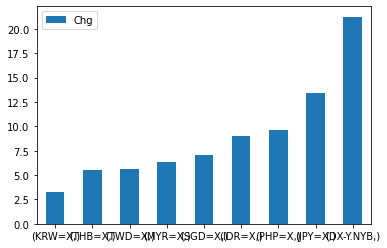

In [ ]:
# Forex charts
data = []
for col in c_df:
    x = c_df[col][len(c_df) - 1] / c_df[col][1] - 1
    data.append(round(x * 1000, 2))
print(data)
c_df_chart = pd.DataFrame(data, columns = ['Chg'], index = [currency])
c_df_chart
ax = c_df_chart.sort_values(by=['Chg']).plot.bar(rot = 0)

In [ ]:
df_lst = [['a', 'b', 'c'], # USDPHP # 100 rows
          ['c', 'd', 'e'], # GBPPHP # 100 rows
          ['e', 'f', 'g']] # EURPHP # 100 rows

new_df_lst = []
for x in range(len(df_lst)): # first axis
    df_lst_x = [] # list of x iterations
    for y in range(0, len(df_lst[x]), 1): # second axis # range(x, y, z) z is step function
        x += define pandas sht df_lst[y:len(df_lst[x])] # make small list
    new_df_lst.append(x) # add to big boi list
        # df_lst[1][0:3] = ['a','b','c']
        # df_lst[1][1:3] = ['b','c']
        # df_lst[1][2:3] = ['c']

        # df_lst[1][0:3] = ['a','b','c']
        # df_lst[1][0:2] = ['a','b']
        # df_lst[1][0:1] = ['a']

        # ['a','b','c'], ['a','b'], ['a']
        # ['d','e','f'], ['d','e'], ['d']
        # ['g','h','i'], ['g','h'], ['g']

#[ 0:100]
#[20:100]
#[40:100]
#[60:100]

new_df_lst # 30 dfs 

In [1]:
for x in range(0,10,2):
    print(x)

0
2
4
6
8
